In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')

In [3]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [4]:
df.rename(columns={'MONATSZAHL':'Category','AUSPRAEGUNG':'Accident_type','JAHR':'Year','MONAT':'Month','WERT':'Value'},inplace=True)

In [5]:
df_new=df.drop(df.columns[-4:],axis=1)

In [6]:
df_new.head(2)

,Category,Accident_type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       2086 non-null   object 
 1   Accident_type  2086 non-null   object 
 2   Year           2086 non-null   int64  
 3   Month          2086 non-null   object 
 4   Value          2002 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.6+ KB


In [8]:
data=df_new[df_new['Year']<2021]

In [9]:
data

,Category,Accident_type,Year,Month,Value
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [10]:
data['Category'].value_counts()

Verkehrsunfälle    819
Alkoholunfälle     546
Fluchtunfälle      546
Name: Category, dtype: int64

Text(0.5, 1.0, 'Total number of Accident based on Category')

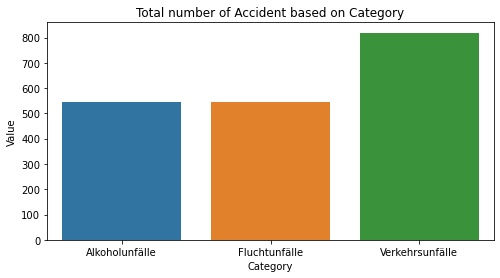

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='Category',data=data)
plt.ylabel('Value')
plt.title('Total number of Accident based on Category')

In [12]:
data['Accident_type'].value_counts()

insgesamt                 819
Verletzte und Getötete    819
mit Personenschäden       273
Name: Accident_type, dtype: int64

Text(0.5, 1.0, 'Total number of accident for different Accident_type')

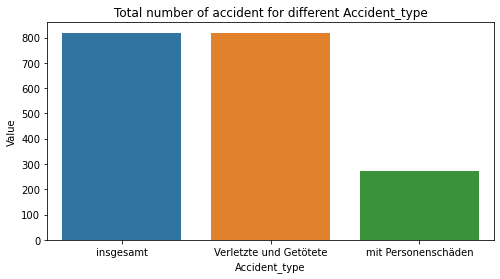

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x='Accident_type',data=data)
plt.ylabel('Value')
plt.title('Total number of accident for different Accident_type')

In [14]:
df_total = data[data['Month']=='Summe']

In [15]:
df_total

,Category,Accident_type,Year,Month,Value
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
38,Alkoholunfälle,insgesamt,2019,Summe,434.0
51,Alkoholunfälle,insgesamt,2018,Summe,398.0
64,Alkoholunfälle,insgesamt,2017,Summe,409.0
77,Alkoholunfälle,insgesamt,2016,Summe,301.0
...,...,...,...,...,...
2021,Verkehrsunfälle,Verletzte und Getötete,2004,Summe,6219.0
2034,Verkehrsunfälle,Verletzte und Getötete,2003,Summe,6365.0
2047,Verkehrsunfälle,Verletzte und Getötete,2002,Summe,7026.0
2060,Verkehrsunfälle,Verletzte und Getötete,2001,Summe,7452.0


In [16]:
data_total = df_total[df_total['Accident_type']== 'insgesamt'].sort_values('Year')

In [17]:
data_total.tail()

,Category,Accident_type,Year,Month,Value
634,Fluchtunfälle,insgesamt,2019,Summe,11773.0
38,Alkoholunfälle,insgesamt,2019,Summe,434.0
1217,Verkehrsunfälle,insgesamt,2020,Summe,38434.0
621,Fluchtunfälle,insgesamt,2020,Summe,10024.0
25,Alkoholunfälle,insgesamt,2020,Summe,430.0


In [18]:
data_total.shape

(63, 5)

In [19]:
data_category=data_total.pivot_table(index = 'Year',columns = 'Category',values = 'Value')

In [20]:
data_category

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Year,,,
2000,934.0,11467.0,44494.0
2001,848.0,11396.0,45713.0
2002,803.0,10651.0,40608.0
2003,730.0,9611.0,38635.0
2004,659.0,10547.0,40064.0
2005,600.0,11037.0,40723.0
2006,599.0,8629.0,38333.0
2007,560.0,9127.0,38562.0
2008,482.0,9345.0,38362.0


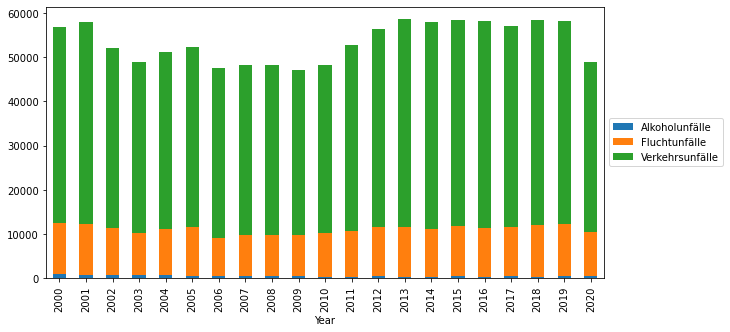

In [21]:
data_category.plot.bar(stacked=True,figsize=(10,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

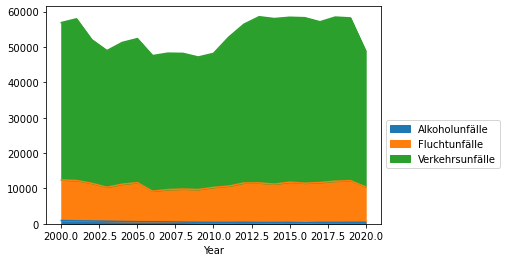

In [22]:
data_category.plot(kind='area').legend(loc='upper left', bbox_to_anchor=(1, 0.5))

In [23]:
df_1=data[data['Category']=='Alkoholunfälle']

In [24]:
df_2=df_1[df_1['Accident_type']=='insgesamt']

In [25]:
df_2.shape

(273, 5)

In [26]:
df_2.tail(13)

,Category,Accident_type,Year,Month,Value
285,Alkoholunfälle,insgesamt,2000,Summe,934.0
286,Alkoholunfälle,insgesamt,2000,200001,78.0
287,Alkoholunfälle,insgesamt,2000,200002,53.0
288,Alkoholunfälle,insgesamt,2000,200003,73.0
289,Alkoholunfälle,insgesamt,2000,200004,78.0
290,Alkoholunfälle,insgesamt,2000,200005,96.0
291,Alkoholunfälle,insgesamt,2000,200006,57.0
292,Alkoholunfälle,insgesamt,2000,200007,99.0
293,Alkoholunfälle,insgesamt,2000,200008,77.0
294,Alkoholunfälle,insgesamt,2000,200009,84.0


In [27]:
df_3=df_2[df_2['Month'] !='Summe']

In [28]:
df_3['Month'] = df_3['Month'].apply(lambda Month: Month[-2:])

C:\Users\ARIF\AppData\Local\Temp/ipykernel_5680/3057206377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Month'] = df_3['Month'].apply(lambda Month: Month[-2:])


In [29]:
df_3.isnull().sum()

Category         0
Accident_type    0
Year             0
Month            0
Value            0
dtype: int64

In [30]:
X=df_3[['Year','Month']]
y=df_3['Value']

In [31]:
df_3.tail(13)

,Category,Accident_type,Year,Month,Value
284,Alkoholunfälle,insgesamt,2001,12,66.0
286,Alkoholunfälle,insgesamt,2000,01,78.0
287,Alkoholunfälle,insgesamt,2000,02,53.0
288,Alkoholunfälle,insgesamt,2000,03,73.0
289,Alkoholunfälle,insgesamt,2000,04,78.0
290,Alkoholunfälle,insgesamt,2000,05,96.0
291,Alkoholunfälle,insgesamt,2000,06,57.0
292,Alkoholunfälle,insgesamt,2000,07,99.0
293,Alkoholunfälle,insgesamt,2000,08,77.0
294,Alkoholunfälle,insgesamt,2000,09,84.0


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [33]:
model=RandomForestRegressor()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
predict=model.predict(X_test)

In [37]:
#model accuracy
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test, predict)

0.7528452016780927

In [39]:
inp=np.array([[2021, 7]])

In [40]:
model.predict(inp)

array([54.31])

In [41]:
import pickle

In [43]:
#to save the model
pickle.dump(model, open('model.pkl','wb'))